# Ego4D Moments Benchmark (NLQ) Quickstart

Please set your resources to GPU (Runtime -> Change runtime type -> GPU).

This quickstart will show:
1. An overview of the training data
2. How to train the baseline (VSLNet)

To begin: add your **access keys** below, change your Runtime Type to **GPU**, and run cells **one by one** as you read through. This helps avoid timeouts since Colab gives more GPU cycles to interactive notebooks.

## Resources
- [Baseline Repo](https://github.com/EGO4D/episodic-memory/tree/main/NLQ/VSLNet)
- [Docs](https://ego4d-data.org/docs/benchmarks/episodic-memory/)
- [EvalAI Challenge](https://eval.ai/web/challenges/challenge-page/1629/overview)

## Download Data and Setup Environment

### **Fill In Your Access Info Here**
If you don't have access and secret keys, first sign the Ego4D License at [ego4ddataset.com](https://ego4ddataset.com)

In [ ]:
import os
os.environ['AWS_ACCESS_KEY_ID'] = ""
os.environ['AWS_SECRET_ACCESS_KEY'] = ""

### **Set up CLIs and Download Annotations + Repo**

In [ ]:
# Download the AWS and Ego4D CLIs, then download the annotations locally
%%bash

# Set up the AWS CLI
curl "https://awscli.amazonaws.com/awscli-exe-linux-x86_64.zip" -o "awscliv2.zip"
unzip -o awscliv2.zip >/dev/null
sudo ./aws/install >/dev/null 2>&1
aws configure set aws_access_key_id "$AWS_ACCESS_KEY_ID" && aws configure set aws_secret_access_key "$AWS_SECRET_ACCESS_KEY"
rm "awscliv2.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57.8M  100 57.8M    0     0  90.0M      0 --:--:-- --:--:-- --:--:-- 90.0M


### Install the ego4d CLI and Download Data

In [ ]:
# Set up the Ego4D CLI
!pip install ego4d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 721.5 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 5.5 MB/s eta 0:00:00
  Created wheel for ego4d: filename=ego4d-1.7.3-py3-none-any.whl size=118251 sha256=f14e09539d9e6fd4a079a570814d3f7802610c6a29bf504dac484db300b57b0e
  Stored in directory: /root/.cache/pip/wheels/65/a8/89/a6187e3bc9a85e81899ab8d5ddc2011c9954d3b6cb84d47e03
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31532 sha2

In [ ]:
# Download the Ego4D Annotations to ego4d_data/
!ego4d --output_directory="/content/ego4d_data/" --datasets annotations --benchmarks nlq -y --version v1

Datasets to download: {'annotations'}
Download Path: /content/ego4d_data/v1
Ego4D Metadata: /content/ego4d_data/ego4d.json
Checking requested datasets and versions...
Created download directory for version 'v1' of dataset: 'annotations' at: /content/ego4d_data/v1/annotations
Benchmarks specified but ignored without a benchmarks field in manifest.
Retrieving object metadata from S3...
100% 31/31 [00:00<00:00, 1206.11object/s]
Checking if latest file versions are already downloaded...
  0% 0/31 [00:00<?, ?file/s]WARNING:urllib3.connectionpool:Connection pool is full, discarding connection: ego4d-consortium-sharing.s3.us-west-1.amazonaws.com. Connection pool size: 10
 32% 10/31 [00:00<00:01, 18.38file/s]WARNING:urllib3.connectionpool:Connection pool is full, discarding connection: ego4d-consortium-sharing.s3.us-west-1.amazonaws.com. Connection pool size: 10
100% 31/31 [00:00<00:00, 53.46file/s]
No existing videos to filter.
100% 2.50G/2.51G [00:31<00:00, 134MiB/s]Checking file integrity..

# Install vlp features

In [ ]:
!mkdir /content/ego4d_data/v1/egovlp_fp16/

In [ ]:
from google.colab import drive
import shutil
import tarfile
import os

drive.mount('/content/drive')

# Copy the file from Google Drive
file_path = '/content/drive/My Drive/egovlp_fp16.tar.gz'  # Replace with your file path in Google Drive
destination = '/content/ego4d_data/v1/egovlp_fp16/egovlp_fp16.tar.gz'

shutil.copy(file_path, destination)

tar = tarfile.open(destination, "r")
tar.extractall(path="/content/ego4d_data/v1/egovlp_fp16")
tar.close()

os.remove(destination)


Mounted at /content/drive


### Check Downloaded Files

In [ ]:
# Ensure we have downloaded the files correctly
!ls /content/ego4d_data/v1/annotations | grep nlq

nlq_test_unannotated.json
nlq_train.json
nlq_val.json


In [ ]:
!ls /content/ego4d_data/v1/egovlp_fp16 | wc -l

9611


### Clone the Episodic Memory Baseline Repository

In [ ]:
# Original repo: https://github.com/EGO4D/episodic-memory
# Deleted line: git checkout nlq_fixes_and_fp16_support
%%bash
git clone https://github.com/uzunov02/episodic-memory
cd episodic-memory
git pull


Already up to date.


Cloning into 'episodic-memory'...


In [ ]:
# !rm -rf episodic-memory/

# Stats for nlq_train

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
ann_data = json.load(open("/content/ego4d_data/v1/annotations/nlq_train.json"))

In [ ]:
# # please see https://ego4d-data.org/docs/data/annotations-schemas/
# anns = []
# for vid in ann_data["videos"]:
#     for clip in vid["clips"]:
#         for ann in clip["annotations"]:
#             for query in ann["language_queries"]:
#                 anns.append({
#                     "query_start_time_sec": clip["video_start_sec"],
#                     "query_end_time_sec": clip["video_end_sec"],
#                     "query_response_start_time_sec": query["video_start_sec"],
#                     "query_response_end_time_sec": query["video_end_sec"],
#                     "query_template": query.get("template", None),
#                     "query": query.get("query", None),
#                 })

In [ ]:
# please see https://ego4d-data.org/docs/data/annotations-schemas/
number_of_queries_per_video = []
number_of_queries_per_clip = []
number_of_queries_per_annotation = []
anns = []
for vid in ann_data["videos"]:

    number_of_queries_v = 0
    for clip in vid["clips"]:

        number_of_queries_c = 0
        for ann in clip["annotations"]:

            num_of_q_ann = 0
            for query in ann["language_queries"]:
                anns.append({
                    "query_start_time_sec": clip["video_start_sec"],
                    "query_end_time_sec": clip["video_end_sec"],
                    "query_response_start_time_sec": query["video_start_sec"],
                    "query_response_end_time_sec": query["video_end_sec"],
                    "query_template": query.get("template", None),
                    "query": query.get("query", None),
                })
                num_of_q_ann = num_of_q_ann +1
                number_of_queries_c = number_of_queries_c +1
                number_of_queries_v = number_of_queries_v +1
            number_of_queries_per_annotation.append(num_of_q_ann)
        number_of_queries_per_clip.append(number_of_queries_c)
    number_of_queries_per_video.append(number_of_queries_v)

In [ ]:
print("Total number of videos:", len(number_of_queries_per_video))
print("Total number of clips:", len(number_of_queries_per_clip))
print("Total number of annotations:", len(number_of_queries_per_annotation))
print("Total number of queries:", len(anns))

Total number of videos: 754
Total number of clips: 998
Total number of annotations: 1616
Total number of queries: 11296


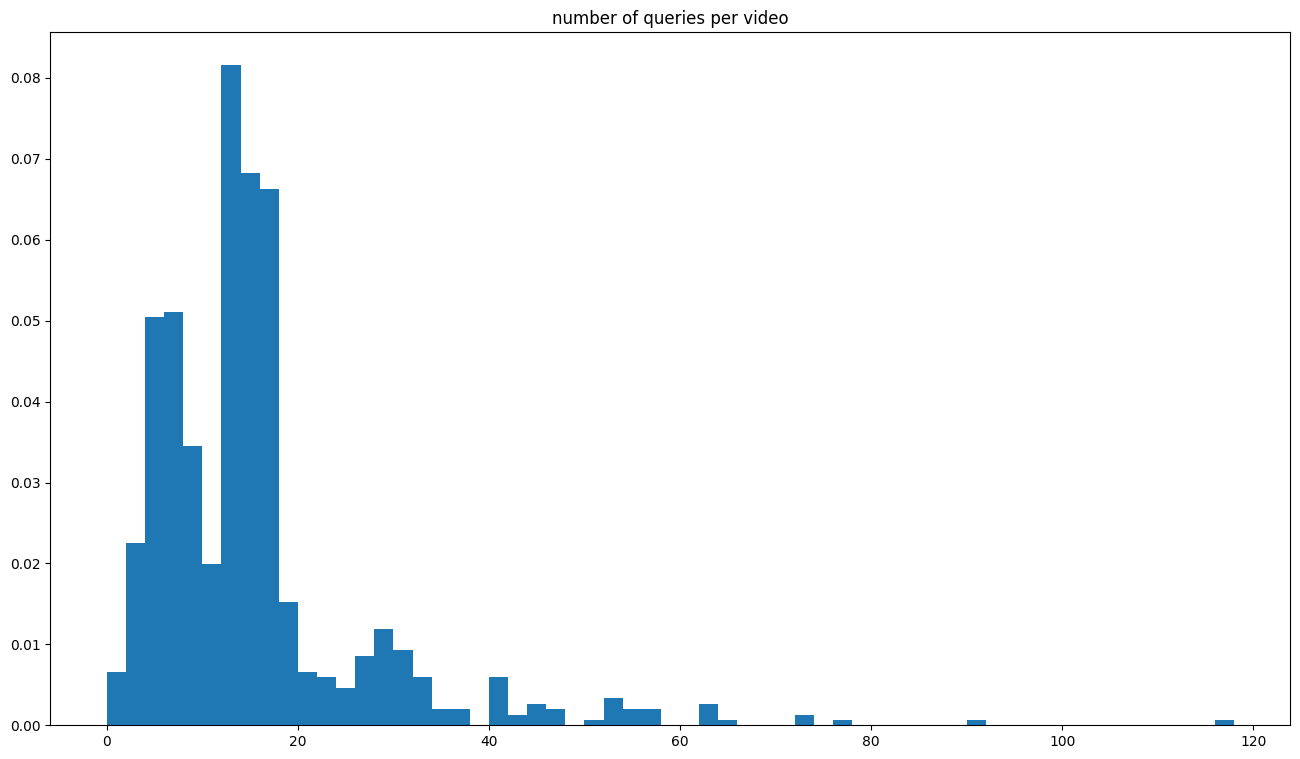

Average queries per video: 14.981432360742705
Number of videos with 0 queries: 9


In [ ]:
import numpy as np

plt.rcParams["figure.figsize"] = (16, 9)
plt.hist(number_of_queries_per_video, density=True, bins = len(set(number_of_queries_per_video)))
plt.title("number of queries per video")
plt.show()
print("Average queries per video:", np.mean(number_of_queries_per_video))
print("Number of videos with 0 queries:", number_of_queries_per_video.count(0))

{'whiskers': [<matplotlib.lines.Line2D at 0x7def34597d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7def34314df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7def34594850>],
 'medians': [<matplotlib.lines.Line2D at 0x7def3537bbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7def3537ae60>],
 'means': []}

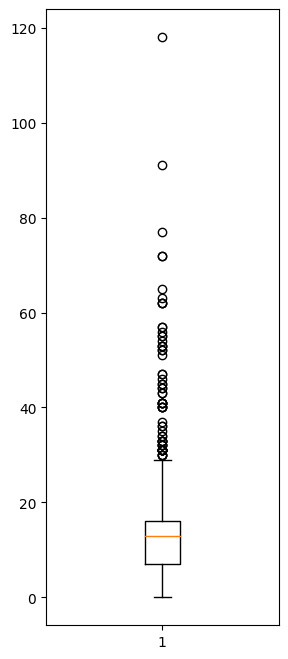

In [ ]:
plt.rcParams["figure.figsize"] = (3, 8)

plt.boxplot(number_of_queries_per_video)

In [ ]:
print("25th Percentile (Q1):", np.percentile(number_of_queries_per_video, 25))
print("75th Percentile (Q3):", np.percentile(number_of_queries_per_video, 75))

25th Percentile (Q1): 7.0
75th Percentile (Q3): 16.0


**We notice that there are 7-16 narrations per video on average. We can make a randomizer to pick a random value between 7 and 16 - how many narrations per video (one clip only).**


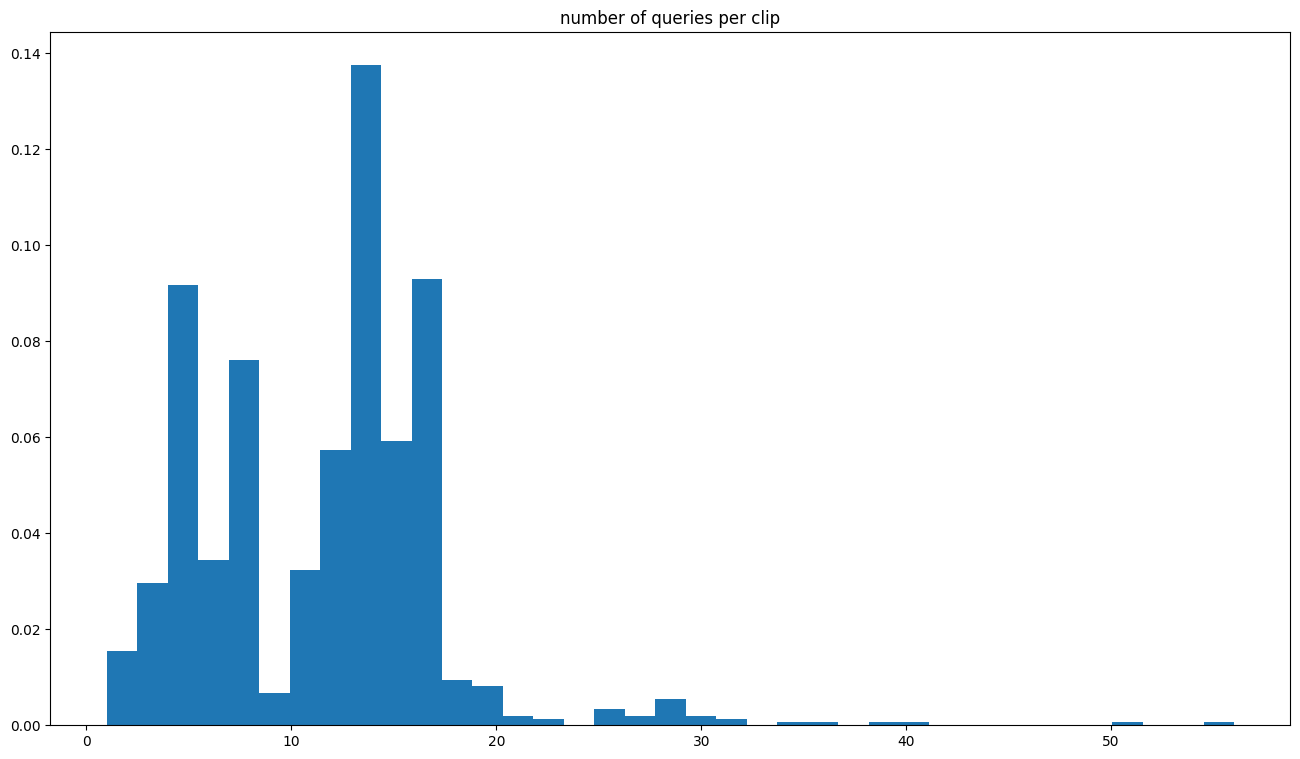

Average queries per clip: 11.318637274549099
Number of clips with 0 queries: 0


In [ ]:
plt.rcParams["figure.figsize"] = (16, 9)
plt.hist(number_of_queries_per_clip, density=True, bins = len(set(number_of_queries_per_clip)))
plt.title("number of queries per clip")
plt.show()
print("Average queries per clip:", np.mean(number_of_queries_per_clip))
print("Number of clips with 0 queries:", number_of_queries_per_clip.count(0))

Text(0.5, 1.0, 'Boxplot clip')

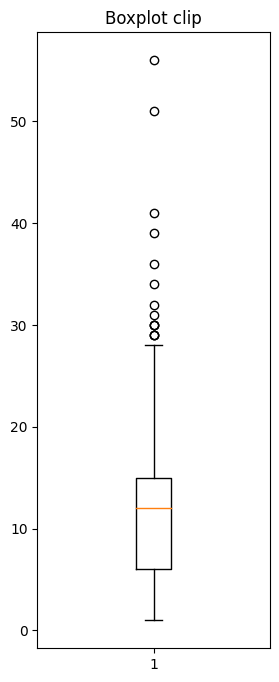

In [ ]:
plt.rcParams["figure.figsize"] = (3, 8)

plt.boxplot(number_of_queries_per_clip)
plt.title("Boxplot clip")

In [ ]:
print("25th Percentile (Q1):", np.percentile(number_of_queries_per_clip, 25))
print("50th Percentile (Q2):", np.percentile(number_of_queries_per_clip, 50))
print("75th Percentile (Q3):", np.percentile(number_of_queries_per_clip, 75))

25th Percentile (Q1): 6.0
50th Percentile (Q2): 12.0
75th Percentile (Q3): 15.0


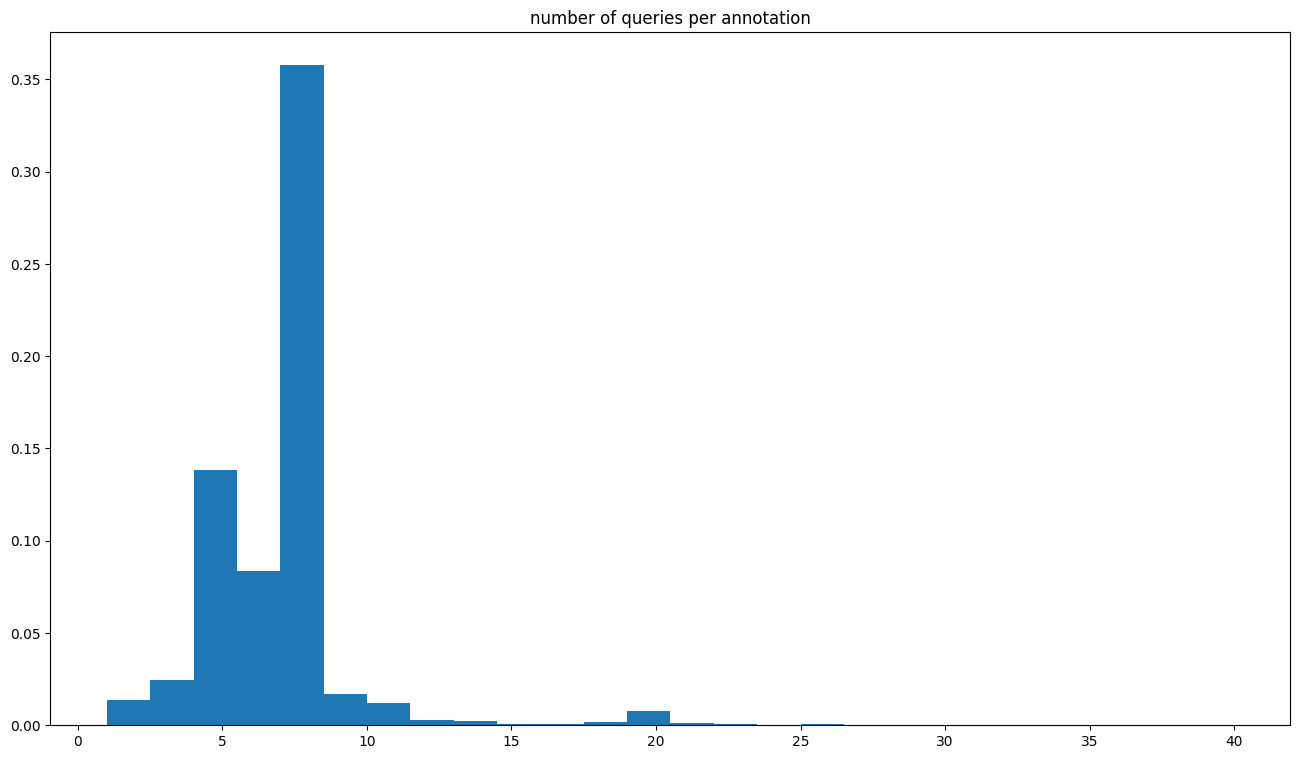

Average queries per annotation: 6.99009900990099
Number of annotations with 0 queries: 0


In [ ]:
plt.hist(number_of_queries_per_annotation, density=True, bins = len(set(number_of_queries_per_annotation)))
plt.title("number of queries per annotation")
plt.show()
print("Average queries per annotation:", np.mean(number_of_queries_per_annotation))
print("Number of annotations with 0 queries:", number_of_queries_per_annotation.count(0))

We see that the average query count per clip is 11, while the average annotation count is 7. Let's assume that we want to keep the idea and use only 11 (6-15) queries per clip. If our goal is around 25000 queries, we need 22400/11 approximately 2000 clips or around 25% of the clips. I think that we should use a seed and a randomizer, create a dataset with only 25 percent of the data and then later we can always add more 25% to see if by enhancing the dataset, the result gets better or worse




**Final idea**: we use between nar_per_clip =  6 and 15 narrations per clip, where we take narrations from different places(for example, if nar_per_clip = 13 once 6 and once 7). We use only one clip per video because we saw that most videos have only one clip in nlq_train and we take around 2000 videos. This way, our nlq_pretrain will be a little bit more than twice bigger than nlq_train. We will use randomizer between 0 and len(videos) and we will keep track of which videos and clips we have used. We will create many versions of nlq_pretrain with for example 500, 1000, 1500, 2000 videos to observe if the performance increases. If yes, we will add more data. We will keep track of which videos we have used so that we don't create queries for the same video twice.

In [ ]:
# #This is an example of how we can do it

# import random

# # Set a seed for reproducibility
# random.seed(42)

# # Generate the first batch of 2000 unique random integers
# first_batch = random.sample(range(8001), 2000)

# # Generate the second batch ensuring no duplicates with the first batch
# second_batch = random.sample([i for i in range(8001) if i not in first_batch], 2000)

# print("First batch:", first_batch)
# print("Second batch:", second_batch)


In [ ]:
num_queries = len(anns)
relative_query_sizes = np.array([
    (a["query_response_end_time_sec"] - a["query_response_start_time_sec"]) / (a["query_end_time_sec"] - a["query_start_time_sec"])
    for a in anns
])
query_sizes = np.array([
    (a["query_response_end_time_sec"] - a["query_response_start_time_sec"])
    for a in anns
])
clip_sizes = np.array([
    (a["query_end_time_sec"] - a["query_start_time_sec"])
    for a in anns
])

## Query / Response Durations

Here we can see that there are some queries with 0s. When training it is reccomended to remove them from the set. For VSLNet you can provide `--remove_empty_queries_from train` to `main.py` (e.g. if you are modifying this codebase).

In [ ]:
query_sizes.max(), query_sizes.min(), query_sizes.std()

(480.0, 0.0, 22.82781402544118)

In [ ]:
# less than or equal to 4 frames => 9% of training data
(query_sizes <= 4/30).sum() / len(relative_query_sizes)

0.09012039660056657

## Distribution of Queries (relative)

Here is a histogram plot of the relative query size to the clip size.

In [ ]:
plt.rcParams["figure.figsize"] = (16, 9)

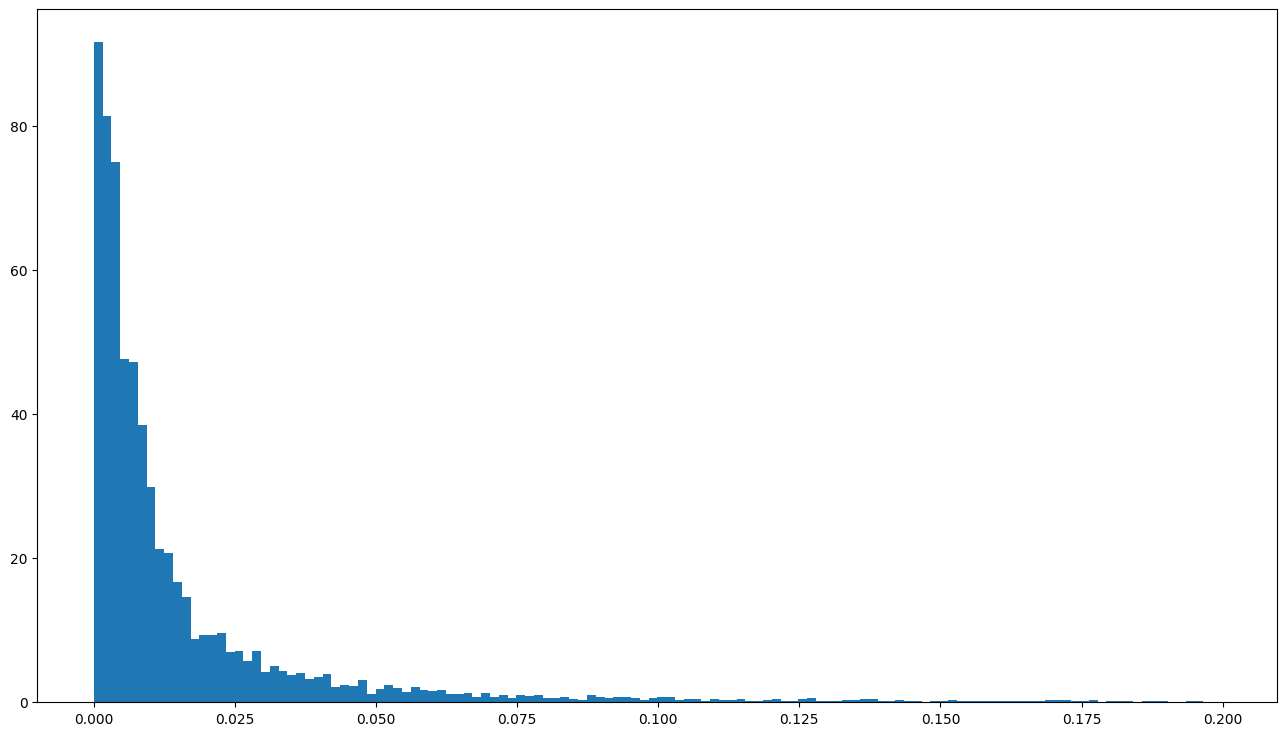

In [ ]:
plt.hist(relative_query_sizes[relative_query_sizes < 0.2], density=True, bins=128)
plt.show()

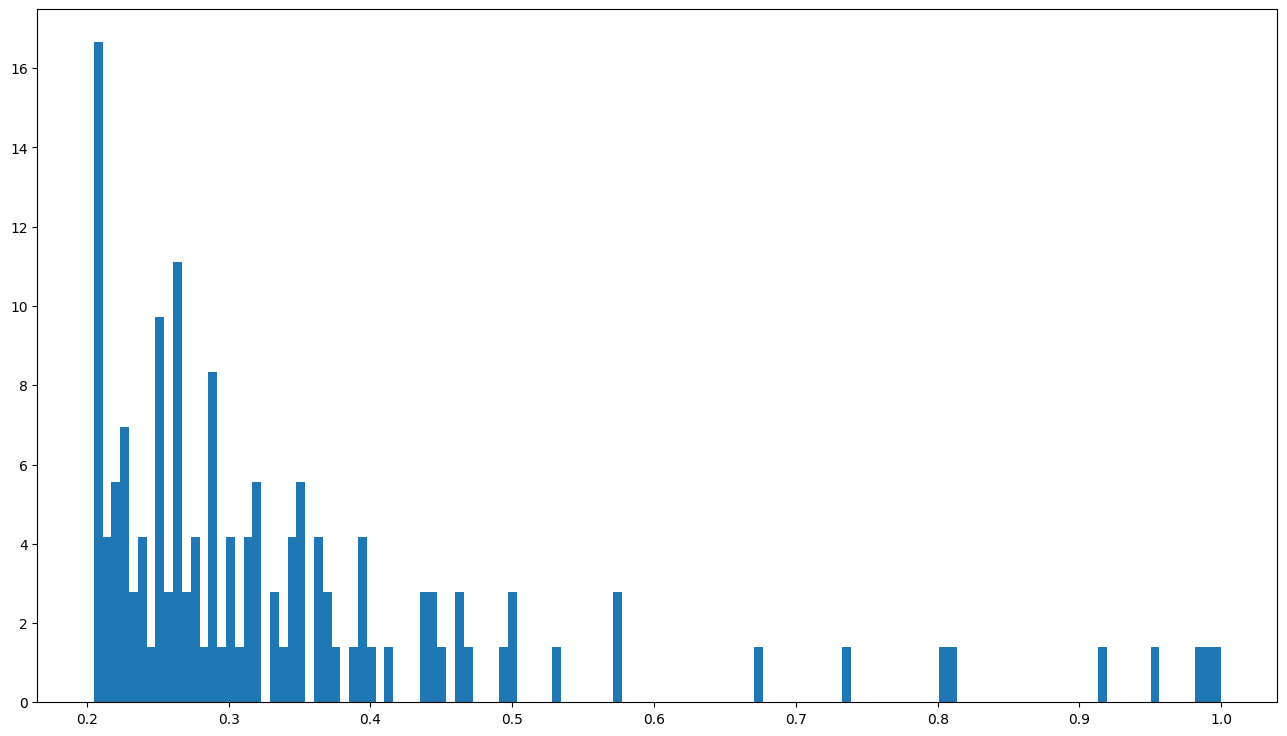

In [ ]:
plt.hist(relative_query_sizes[relative_query_sizes > 0.2], density=True, bins=128)
plt.show()

## Clip Sizes

Clips are 522s on average, with most clips being 480s.

In [ ]:
clip_sizes.mean(), clip_sizes.max(), clip_sizes.min(), clip_sizes.std(), np.median(clip_sizes)

(522.6759852928087,
 1200.0666422526042,
 207.16666666666674,
 197.6377591205408,
 480.0)

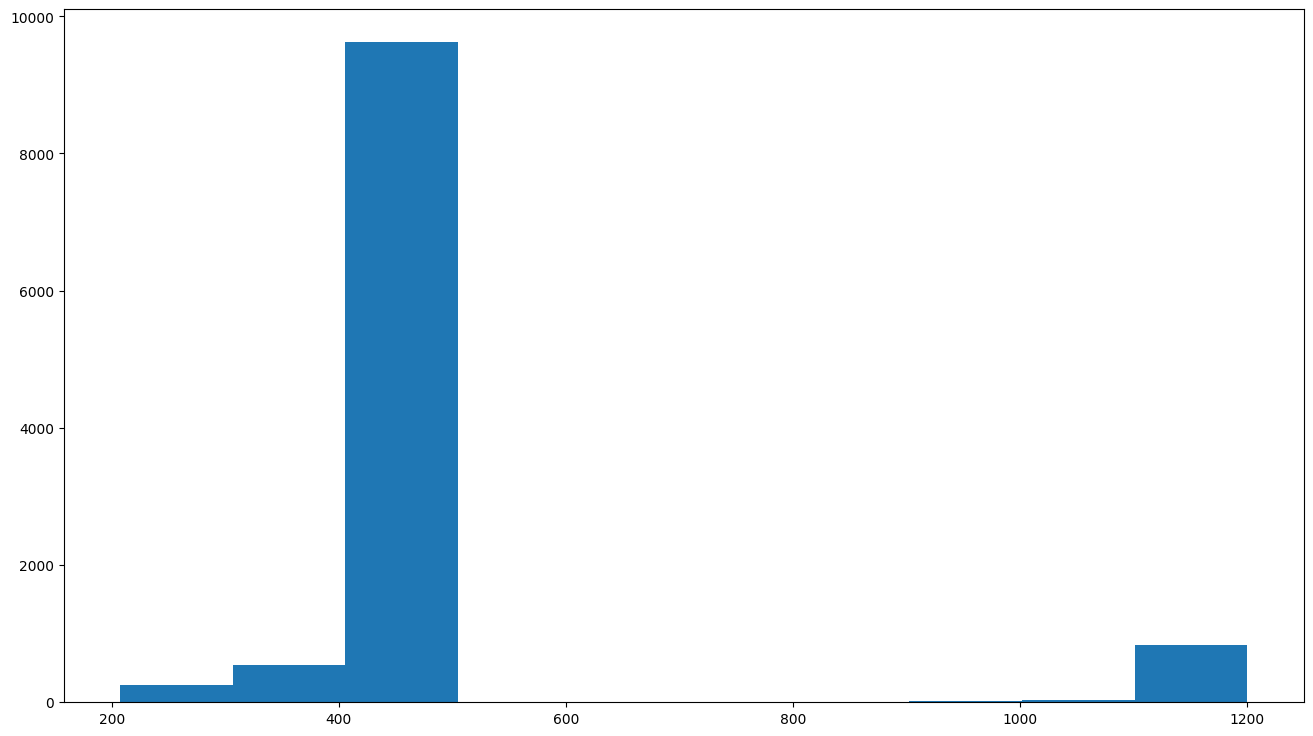

In [ ]:
plt.hist(clip_sizes)
plt.show()

# Stats for custom dataset

In [ ]:
metadata = json.load(open("/content/ego4d_data/ego4d.json"))
narration = json.load(open("/content/ego4d_data/v1/annotations/narration.json"))
nlq_val = json.load(open("/content/ego4d_data/v1/annotations/nlq_val.json"))
nlq_train = json.load(open("/content/ego4d_data/v1/annotations/nlq_train.json"))

In [ ]:
import os

# Define the path to the directory
directory_path = "/content/ego4d_data/v1/egovlp_fp16"

# Get the list of all items in the directory
all_items = os.listdir(directory_path)

# Filter out only the files
features_list = [item[:-3] for item in all_items if os.path.isfile(os.path.join(directory_path, item))]

# Print the list of file names (optional)
print("Number of vides that have visual features:", len(features_list))

Number of vides that have visual features: 19222


In [ ]:
nlq_val_videos = nlq_val.get("videos")
nlq_val_videos_ids= []
for item in nlq_val_videos:
  nlq_val_videos_ids.append(item["video_uid"])

print(len(nlq_val_videos_ids))
# of videos included in nql_val

nlq_train = json.load(open("/content/ego4d_data/v1/annotations/nlq_train.json"))

nlq_train_videos = nlq_train.get("videos")
nlq_train_videos_ids= []
for item in nlq_train_videos:
  nlq_train_videos_ids.append(item["video_uid"])

print(len(nlq_train_videos_ids))
# of videos included in nql_val

247
754


In [ ]:
metadata_clips = metadata.get("clips")
metadata_clips_video_ids = []
for item in metadata_clips:
  metadata_clips_video_ids.append(item["video_uid"])

print(len(metadata_clips_video_ids))
# of videos included in metadata

12283


In [ ]:
narration_videos = list(narration.keys())
print(len(narration_videos))

9645


In [ ]:
excluded_videos = nlq_train_videos_ids + nlq_val_videos

allowed_videos = [item for item in narration_videos if item not in excluded_videos]
print(len(allowed_videos))

8891


In [ ]:
# Convert the lists to sets
set1 = set(features_list)
set2 = set(allowed_videos)

# Find the intersection of the two sets
common_files = set1.intersection(set2)

# Get the count of the common files
common_files_count = len(common_files)

# Print the count
print("Number of common files:", common_files_count)

Number of common files: 8839


Now we create a pseudo nlq_pretrain dataset where instead of creating questions, we directly use the narrations

In [ ]:
big_dictionary = {"videos":[]}


#total 260 MB of data if we use all stuff
counter = 0
skipped_videos = 0
for video_uid in narration:
  if video_uid not in common_files:
    skipped_videos = skipped_videos+1
    continue

  # if counter>=50:   # when 50 the size is the same as train :) which is super good
  #   break

  metadata_clips_as_dict = metadata.get("clips")

  metadata_clips = [item for item in metadata_clips_as_dict if item.get("video_uid") == video_uid]
  if len(metadata_clips) == 0:
    continue

  list_of_clips = []
  for metadata_video in metadata_clips:

    dic_with_metadata = {
        "clip_uid" : metadata_video["clip_uid"],
        "video_start_sec" : metadata_video["video_start_sec"],
        "video_end_sec" : metadata_video["video_end_sec"],
        "annotations":[]
    }

    video = narration[video_uid]
    if not video:
      continue
    narrator_1 = video.get("narration_pass_1")
    if not narrator_1:
      continue
    narrations = (narrator_1.get("narrations"))
    if len(narrations) == 0:
      continue

    language_queries = []
    # we skip the last narration for each video
    for i in range(len(narrations)-1):
      dic = {
          "clip_start_sec" : narrations[i]["timestamp_sec"],
          "clip_end_sec" : narrations[i+1]["timestamp_sec"],
          "query": narrations[i]["narration_text"]
      }
      language_queries.append(dic)
    annotation_uid = narrations[0]["annotation_uid"]
    dic_with_metadata["annotations"].append({
        "language_queries":language_queries,
        "annotation_uid":annotation_uid
        })
    list_of_clips.append(dic_with_metadata)

  if len(list_of_clips) == 0:
    continue
  ids_dictionary = {
      "video_uid" : video_uid,
      "clips": list_of_clips
                    }
  big_dictionary["videos"].append(ids_dictionary)
  counter = counter + 1


print(counter)

2414


In [ ]:

anns = []
number_of_clips_per_video = []
number_of_queries = []
nones_in_query = 0
for vid in big_dictionary["videos"]:
    num_of_clips = 0
    for clip in vid["clips"]:
        num_of_clips = num_of_clips + 1

        for ann in clip["annotations"]:
            number_of_queries.append(len(ann["language_queries"]))
            for query in ann["language_queries"]:
                query_dict = {
                    "query_start_time_sec": clip.get("video_start_sec",None),
                    "query_end_time_sec": clip.get("video_end_sec", None),
                    "query_response_start_time_sec": query.get("clip_start_sec", None),
                    "query_response_end_time_sec": query.get("clip_end_sec",None),
                    "query": query.get("query", None),
                }
                anns.append(query_dict)
                if None in list(query_dict.values()):
                    nones_in_query = nones_in_query + 1
    number_of_clips_per_video.append(num_of_clips)

print(nones_in_query)
print(anns[:5])

0
[{'query_start_time_sec': 0.0, 'query_end_time_sec': 308.0, 'query_response_start_time_sec': 0.0, 'query_response_end_time_sec': 1.85265, 'query': '#C C removes his hands from his head. #unsure'}, {'query_start_time_sec': 0.0, 'query_end_time_sec': 308.0, 'query_response_start_time_sec': 1.85265, 'query_response_end_time_sec': 5.48066, 'query': '#C C sits on a chair in the dining room'}, {'query_start_time_sec': 0.0, 'query_end_time_sec': 308.0, 'query_response_start_time_sec': 5.48066, 'query_response_end_time_sec': 5.9699, 'query': '#C C picks a brush on a table'}, {'query_start_time_sec': 0.0, 'query_end_time_sec': 308.0, 'query_response_start_time_sec': 5.9699, 'query_response_end_time_sec': 6.6229, 'query': '#C C touches the drawing board with his left hand'}, {'query_start_time_sec': 0.0, 'query_end_time_sec': 308.0, 'query_response_start_time_sec': 6.6229, 'query_response_end_time_sec': 7.32183, 'query': '#C C dips the brush in a cup of water'}]


In [ ]:
print("# of annotations", len(anns))

# of annotations 2965677


Number of videos that have 0 clips: 0


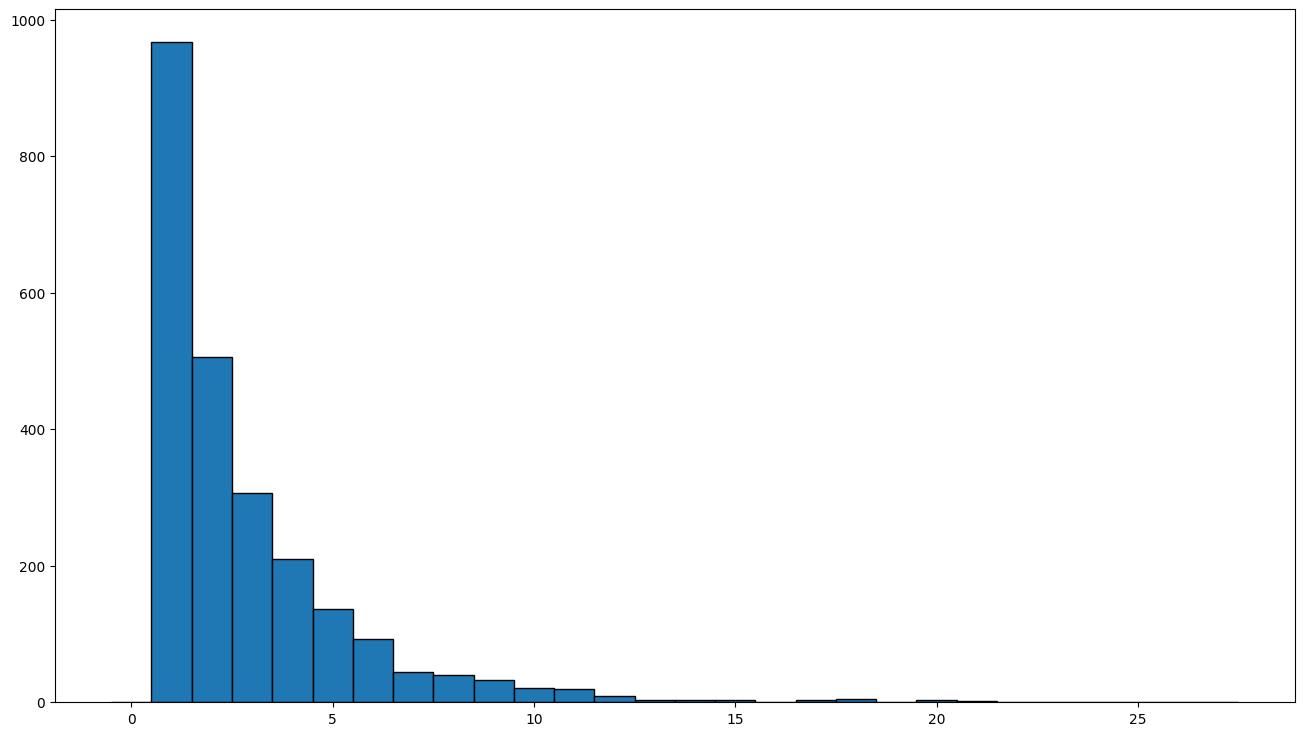

In [ ]:
plt.hist(number_of_clips_per_video, bins=range(0, max(number_of_clips_per_video) + 1), edgecolor='black', align='left')
print("Number of videos that have 0 clips:", number_of_clips_per_video.count(0))

In [ ]:
print("Number of videos:", len(number_of_clips_per_video))
print("Number of clips:", sum(number_of_clips_per_video))
print("The following data is per annotations, not per clips")
print("Average annotations per clip:", np.mean(number_of_queries))
print("Min annotations per clip:", np.min(number_of_queries))
print("Max annotations per clip:", np.max(number_of_queries))
print("Number of clips that have 0 queries:", number_of_queries.count(0))

Number of videos: 2414
Number of clips: 6962
The following data is per annotations, not per clips
Average annotations per clip: 425.98060902039646
Min annotations per clip: 0
Max annotations per clip: 4529
Number of clips that have 0 queries: 7


Possible strategy: We use 11 (or better 6-15 random) narrations per video, we will pick random clip from each video(fix timestamps!!!) and we should get a result approximately 2414 * 11 = 26554 narrations in total. This surpasses our goal of 22400 and it should be enough. I would suggest to iteratevly create and enhane the dataset and to see how the amount of pretrain data influences the outcomes of the model. What I mean is after we do this, we start using clips that we havent used.

# NLQ

In [ ]:
for video in nlq_train_videos:
  if len(video['clips']) > 1:
    json_str = json.dumps(video, indent=4)
    print(json_str)
    vid_uid = video["video_uid"]
    break

{
    "video_uid": "1f5ca4f1-6200-4a9a-86af-150824b51f67",
    "clips": [
        {
            "clip_uid": "1fda3b6a-d01f-44f6-bba0-ae171d558129",
            "video_start_sec": 0.0,
            "video_end_sec": 480.0366739908854,
            "video_start_frame": 0,
            "video_end_frame": 14401,
            "clip_start_sec": 0,
            "clip_end_sec": 480.0366739908854,
            "clip_start_frame": 0,
            "clip_end_frame": 14401,
            "source_clip_uid": "ce74bbe0-42b8-4d13-a760-fb3680405021",
            "annotations": [
                {
                    "language_queries": [
                        {
                            "clip_start_sec": 134.01252,
                            "clip_end_sec": 152.599,
                            "video_start_sec": 134.01252,
                            "video_end_sec": 152.599,
                            "video_start_frame": 4020,
                            "video_end_frame": 4578,
                          

## Metadata

In [ ]:
metadata_clips = [item for item in metadata_clips_as_dict if item.get("video_uid") == vid_uid]
json_str = json.dumps(metadata_clips, indent=4)
print(json_str)

[
    {
        "clip_uid": "1fda3b6a-d01f-44f6-bba0-ae171d558129",
        "video_uid": "1f5ca4f1-6200-4a9a-86af-150824b51f67",
        "video_start_sec": 0.0,
        "video_end_sec": 480.0366739908854,
        "video_start_frame": 0,
        "video_end_frame": 14401,
        "clip_metadata": {
            "fps": 30.0,
            "num_frames": 14401,
            "video_codec": "vp9",
            "audio_codec": null,
            "display_resolution_width": 1920,
            "display_resolution_height": 1440,
            "sample_resolution_width": 1920,
            "sample_resolution_height": 1440,
            "mp4_duration_sec": 480.03,
            "video_start_sec": null,
            "video_duration_sec": 480.033,
            "audio_start_sec": null,
            "audio_duration_sec": null,
            "video_start_pts": 0,
            "video_duration_pts": 7373312,
            "video_base_numerator": 1,
            "video_base_denominator": 15360,
            "audio_start_pts": null

## Narrations

In [ ]:
x_narrations = narration[vid_uid]['narration_pass_1']['narrations']

In [ ]:
json_str = json.dumps(x_narrations[320:332], indent=4)
print(json_str)

[
    {
        "timestamp_sec": 1041.9134966666666,
        "timestamp_frame": 31257,
        "_unmapped_timestamp_sec": 1041.9168300000001,
        "narration_text": "#O Apprentice Y shines a torchlight in the sink.",
        "annotation_uid": "418412b6-dbf2-469d-9acd-db36886c5061"
    },
    {
        "timestamp_sec": 1044.2343766666668,
        "timestamp_frame": 31327,
        "_unmapped_timestamp_sec": 1044.2377099999999,
        "narration_text": "#C C marks the sink with the marker in his right hand.",
        "annotation_uid": "418412b6-dbf2-469d-9acd-db36886c5061"
    },
    {
        "timestamp_sec": 1048.2638366666665,
        "timestamp_frame": 31448,
        "_unmapped_timestamp_sec": 1048.26717,
        "narration_text": "#O Apprentice Y drops the torchlight in the sink.",
        "annotation_uid": "418412b6-dbf2-469d-9acd-db36886c5061"
    },
    {
        "timestamp_sec": 1054.2992966666666,
        "timestamp_frame": 31629,
        "_unmapped_timestamp_sec": 1054.3026

In [ ]:
big_dictionary = {"videos":[]}
minus = 0

#total 260 MB of data if we use all stuff
counter = 0
skipped_videos = 0
for video_uid in narration:
  if video_uid not in common_files:
    skipped_videos = skipped_videos+1
    continue

  # if counter>=50:   # when 50 the size is the same as train :) which is super good
  #   break

  metadata_clips_as_dict = metadata.get("clips")

  metadata_clips = [item for item in metadata_clips_as_dict if item.get("video_uid") == video_uid]
  if len(metadata_clips) == 0:
    minus=minus+1
    continue

  list_of_clips = []
  for metadata_video in metadata_clips:

    dic_with_metadata = {
        "clip_uid" : metadata_video["clip_uid"],
        "video_start_sec" : metadata_video["video_start_sec"],
        "video_end_sec" : metadata_video["video_end_sec"],
        "annotations":[]
    }

    video = narration[video_uid]
    if not video:
      continue
    narrator_1 = video.get("narration_pass_1")
    if not narrator_1:
      continue
    narrations = (narrator_1.get("narrations"))
    if len(narrations) == 0:
      continue

    language_queries = []
    # we skip the last narration for each video
    for i in range(len(narrations)-1):
      if narrations[i]["timestamp_sec"] < dic_with_metadata["video_start_sec"] or narrations[i+1]["timestamp_sec"] > dic_with_metadata["video_end_sec"]:
        continue

      dic = {
          "clip_start_sec" : narrations[i]["timestamp_sec"] - dic_with_metadata["video_start_sec"],
          "clip_end_sec" : narrations[i+1]["timestamp_sec"] - dic_with_metadata["video_start_sec"],
          "query": narrations[i]["narration_text"]
      }
      language_queries.append(dic)
    annotation_uid = narrations[0]["annotation_uid"]
    dic_with_metadata["annotations"].append({
        "language_queries":language_queries,
        "annotation_uid":annotation_uid
        })
    list_of_clips.append(dic_with_metadata)

  if len(list_of_clips) == 0:
    continue
  ids_dictionary = {
      "video_uid" : video_uid,
      "clips": list_of_clips
                    }
  big_dictionary["videos"].append(ids_dictionary)
  counter = counter + 1


print(counter)

2414


In [ ]:
print(skipped_videos)
print(len(narration) - len (common_files))

806
806


In [ ]:
print(len(common_files))
print(len(narration))

8839
9645


In [ ]:
print("videos with 0 clips:", minus)

videos with 0 clips: 5716
